In [13]:
import tensorcircuit as tc
import numpy as np
from matplotlib import pyplot as plt
K = tc.set_backend('tensorflow')

edges = []

n, m = map(int, input().split())
for _ in range(m):
    edges.append([int(i) for i in input().split()])

p = int(input())

# n,m=4,3
# edges.append((0,1));
# edges.append((1,2));
# edges.append((2,3));
# edges.append((3,0));
# p=4;

def u_beta(c, beta):
    for i in range(n):
        c.rx(i, theta = beta)

def u_gamma(c, gamma):
    for e in edges:
        x, y = e
        c.rzz(x, y, theta = gamma)

betas = [ 1. for _ in range(p) ]
gammas = [ 1. for _ in range(p) ]

def loss_cell(params):
    betas, gammas = params[:p],params[p:]
    c = tc.Circuit(n);
    for i in range(n):
        c.h(i)
    for i in range(p):
        u_gamma(c, gammas[i])
        u_beta(c, betas[i])
    return c

def loss(params):
    c = loss_cell(params)
    Loss = K.real(0.);
    for e in edges:
        Loss += K.real(c.expectation_ps(z = [e[0], e[1]]))
    return Loss

print(loss(betas+gammas))

4 3
0 1
1 2
2 3
3
tf.Tensor(-0.07495286, shape=(), dtype=float32)


In [14]:
speed = 0.01
# speed = 0.001
gloss = K.grad(loss)
for iteration in range(1000):
    grad = gloss(K.convert_to_tensor(betas+gammas))
#    bef = loss(betas + gammas)
    if iteration % 5 == 0:
        print('On iteration', iteration, ': ', loss(betas + gammas))
    if grad == None or sum(np.abs(x) for x in grad) < 0.01:
        print("break on ",iteration)
        break
    for i in range(p):
        betas[i] -= grad[i] * speed
        gammas[i] -= grad[i + p] * speed
    speed *= 0.99
c=loss_cell(betas + gammas)

print(c.measure(*range(n),with_prob = True))

On iteration 0 :  tf.Tensor(-0.07495286, shape=(), dtype=float32)
On iteration 5 :  tf.Tensor(-1.3964813, shape=(), dtype=float32)
On iteration 10 :  tf.Tensor(-1.7518272, shape=(), dtype=float32)
On iteration 15 :  tf.Tensor(-1.8899238, shape=(), dtype=float32)
On iteration 20 :  tf.Tensor(-1.9876223, shape=(), dtype=float32)
On iteration 25 :  tf.Tensor(-2.0744457, shape=(), dtype=float32)
On iteration 30 :  tf.Tensor(-2.1536314, shape=(), dtype=float32)
On iteration 35 :  tf.Tensor(-2.2231236, shape=(), dtype=float32)
On iteration 40 :  tf.Tensor(-2.2812457, shape=(), dtype=float32)
On iteration 45 :  tf.Tensor(-2.3283162, shape=(), dtype=float32)
On iteration 50 :  tf.Tensor(-2.3661628, shape=(), dtype=float32)
On iteration 55 :  tf.Tensor(-2.3970795, shape=(), dtype=float32)
On iteration 60 :  tf.Tensor(-2.423071, shape=(), dtype=float32)
On iteration 65 :  tf.Tensor(-2.4456272, shape=(), dtype=float32)
On iteration 70 :  tf.Tensor(-2.4657454, shape=(), dtype=float32)
On iteration

On iteration 620 :  tf.Tensor(-2.679786, shape=(), dtype=float32)
On iteration 625 :  tf.Tensor(-2.6797931, shape=(), dtype=float32)
On iteration 630 :  tf.Tensor(-2.6798007, shape=(), dtype=float32)
On iteration 635 :  tf.Tensor(-2.6798043, shape=(), dtype=float32)
On iteration 640 :  tf.Tensor(-2.679813, shape=(), dtype=float32)
On iteration 645 :  tf.Tensor(-2.67982, shape=(), dtype=float32)
On iteration 650 :  tf.Tensor(-2.6798248, shape=(), dtype=float32)
On iteration 655 :  tf.Tensor(-2.679831, shape=(), dtype=float32)
On iteration 660 :  tf.Tensor(-2.679835, shape=(), dtype=float32)
On iteration 665 :  tf.Tensor(-2.6798391, shape=(), dtype=float32)
On iteration 670 :  tf.Tensor(-2.6798463, shape=(), dtype=float32)
On iteration 675 :  tf.Tensor(-2.6798496, shape=(), dtype=float32)
On iteration 680 :  tf.Tensor(-2.679855, shape=(), dtype=float32)
On iteration 685 :  tf.Tensor(-2.6798587, shape=(), dtype=float32)
On iteration 690 :  tf.Tensor(-2.679861, shape=(), dtype=float32)
On 

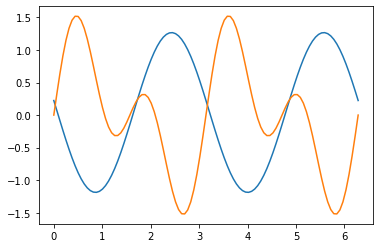

In [16]:
def loss1(a):
    betas[2]=a
    return loss(betas+gammas)

def loss2(a):
    gammas[1]=a
    return loss(betas+gammas)

def draw_function(f,s,t,point_num):
    x_arr,y_arr=[],[]
    for i in range(point_num+1):
        v=s+(t-s)*1./point_num*i;
        x_arr.append(v)
        y_arr.append(f(v))
    plt.plot(x_arr,y_arr)

draw_function(loss1,0,2*np.pi,100)
draw_function(loss2,0,2*np.pi,100)